## **Assignment 2: Regression and classification**
### Stefan Dimitrov Velev, 0MI3400521, Big Data Technologies
### Faculty of Mathematics and Informatics, Sofia University

### **Task 1: Regression**

#### a. Find a linear regression model that relates the living area to the selling price. 
#### If you did any data cleaning step(s), describe what you did and explain why.

In [1]:
# Import required Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from debugpy.common.timestamp import current

from sklearn.linear_model import LinearRegression

In [2]:
# Read the given CSV file
df = pd.read_csv('./data/data_assignment2.csv', delimiter=',')

In [3]:
df.head()

,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
0,1,104,5.0,271.0,25.0,33,4600000
1,2,99,5.0,1506.0,6.0,88,4450000
2,3,133,6.0,486.0,NaN,44,4900000
3,4,175,7.0,728.0,NaN,14,6625000
4,5,118,6.0,1506.0,NaN,29,4600000


In [4]:
print("The number of rows in the data frame is:", len(df))

The number of rows in the data frame is: 56


In [5]:
# Remove the unnecessary columns in the data frame
df = df[['ID', 'Living_area', 'Selling_price']]

In [6]:
df.head()

,ID,Living_area,Selling_price
0,1,104,4600000
1,2,99,4450000
2,3,133,4900000
3,4,175,6625000
4,5,118,4600000


In [7]:
# Remove rows with missing values (if there are any)
df = df.dropna()

In [8]:
print("The number of rows in the data frame is:", len(df))

The number of rows in the data frame is: 56


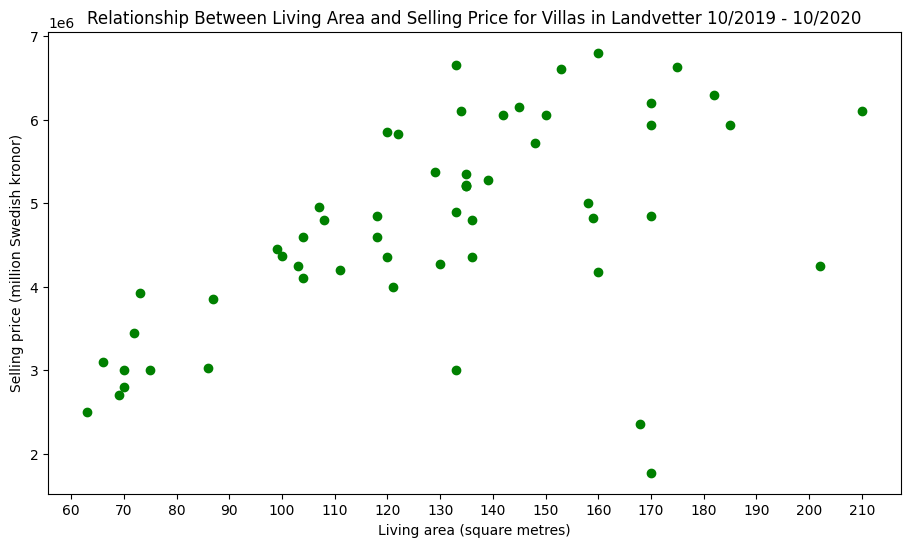

In [19]:
# Draw scatter plot of the data
plt.figure(figsize=(11, 6))
plt.scatter(df['Living_area'], df['Selling_price'], color='green')
plt.xticks(range(60, 220, 10))
plt.xlabel('Living area (square metres)')
plt.ylabel('Selling price (million Swedish kronor)')

plt.title('Relationship Between Living Area and Selling Price for Villas in Landvetter 10/2019 - 10/2020')
plt.show()

In [20]:
# Observe some statistics related to the data
df.describe()

,ID,Living_area,Selling_price
count,56.000000,56.000000,5.600000e+01
mean,28.500000,128.678571,4.713125e+06
std,16.309506,36.006619,1.241117e+06
min,1.000000,63.000000,1.775000e+06
25%,14.750000,104.000000,4.075000e+06
50%,28.500000,133.000000,4.812500e+06
75%,42.250000,154.250000,5.831250e+06
max,56.000000,210.000000,6.800000e+06


In [21]:
# Find the two outliers with relatively big living area but low selling price for a villa
min_price_outliers = df.nsmallest(n= 2, columns = 'Selling_price')
print(min_price_outliers)

    ID  Living_area  Selling_price
40  41          170        1775000
45  46          168        2360000


In [22]:
# Remove the outliers from the df (as these are special cases which will change the regression line if left)
df = df.drop(min_price_outliers.index)

In [23]:
print("The number of rows in the data frame is:", len(df))

The number of rows in the data frame is: 54


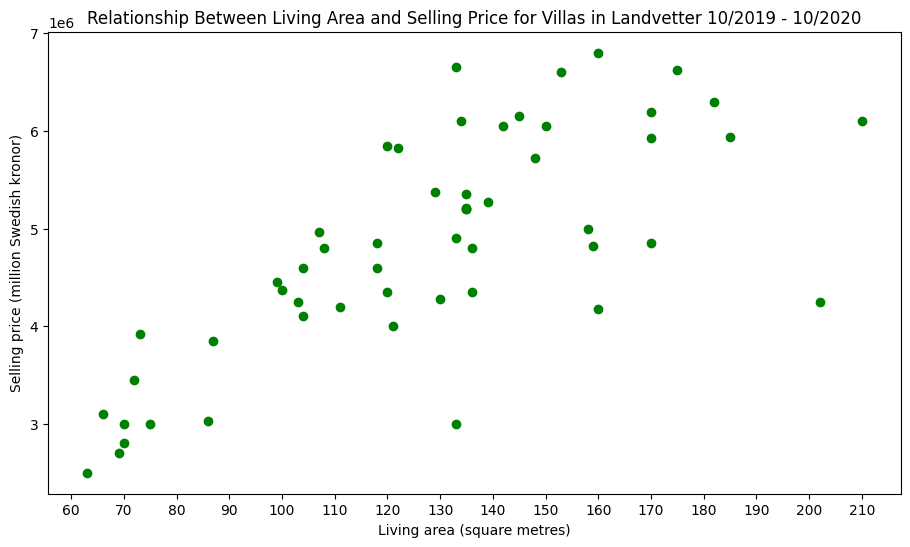

In [24]:
# Draw scatter plot of the data
plt.figure(figsize=(11, 6))
plt.scatter(df['Living_area'], df['Selling_price'], color='green')
plt.xticks(range(60, 220, 10))
plt.xlabel('Living area (square metres)')
plt.ylabel('Selling price (million Swedish kronor)')

plt.title('Relationship Between Living Area and Selling Price for Villas in Landvetter 10/2019 - 10/2020')
plt.show()

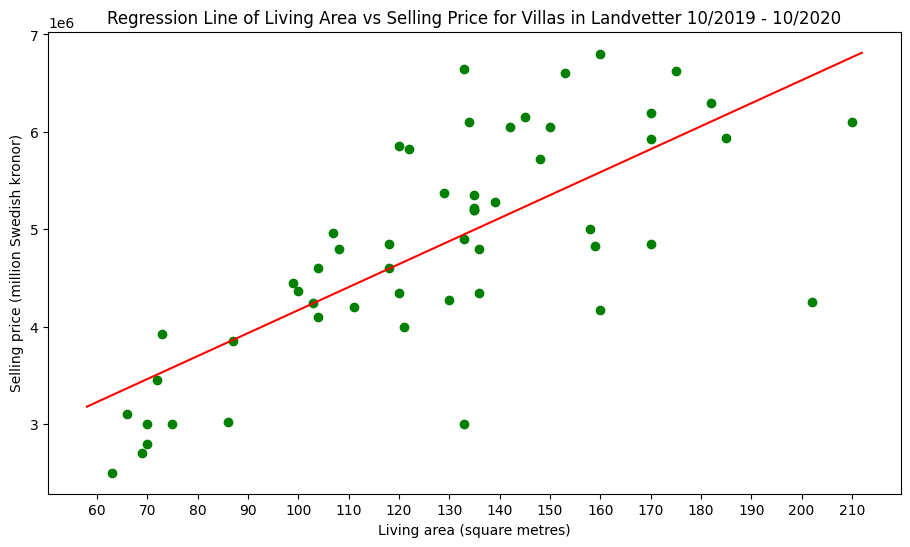

In [54]:
# Construct a linear regression model and visualise the regression line
model = LinearRegression()
model.fit(df['Living_area'].values[:, np.newaxis], df['Selling_price'])
xfit = np.array([58, 212])
yfit = model.predict(xfit[:, np.newaxis])

plt.figure(figsize=(11, 6))
plt.scatter(df['Living_area'], df['Selling_price'], color='green')
plt.plot(xfit, yfit, color='red')

plt.xticks(range(60, 220, 10))
plt.xlabel('Living area (square metres)')
plt.ylabel('Selling price (million Swedish kronor)')

plt.title('Regression Line of Living Area vs Selling Price for Villas in Landvetter 10/2019 - 10/2020')
plt.show()

#### b. What are the values of the slope and intercept of the regression line?

In [27]:
# Find the values of the slope and the intercept with the help of the constructed model
print('The value of the slope (gradient) is:', model.coef_[0])
print('The value of the intercept is:', model.intercept_)

The value of the slope (gradient) is: 23597.794749444976
The value of the intercept is: 1809821.2159409611


#### c. Use this model to predict the selling price of houses which have living area 100 m2, 150 m2 and 200 m2.

In [33]:
# Predict the selling prince of the houses by using the constructed model
living_area_list = [100, 150, 200]
for current_living_area in living_area_list:
    print(f'The predicted selling price of a house with living area of {current_living_area} m2 is {model.predict(np.array([[current_living_area]]))[0]:.2f} Swedish kronor.')

The predicted selling price of a house with living area of 100 m2 is 4169600.69 Swedish kronor.
The predicted selling price of a house with living area of 150 m2 is 5349490.43 Swedish kronor.
The predicted selling price of a house with living area of 200 m2 is 6529380.17 Swedish kronor.


#### d. Draw a residual plot.

In [40]:
# Find correlation (quantifies the strength of a linear trend) with Numpy
y_pred = model.predict(df['Living_area'].values[:, np.newaxis])
correlation_matrix = np.corrcoef(df['Selling_price'], y_pred)
print(f'The correlation R between the actual selling prices and the predicted selling prices with the model is {correlation_matrix[0, 1]:.2f}.')

The correlation R between the actual selling prices and the predicted selling prices with the model is 0.73.


In [50]:
# Calculate the residuals by finding the difference between observed (actual) and expected 
residuals = df['Selling_price'] - y_pred

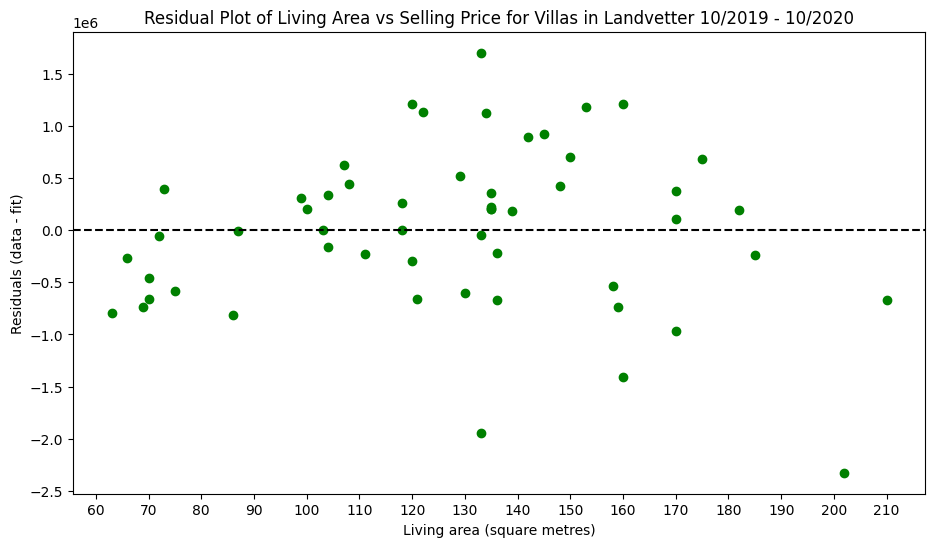

In [58]:
# Draw a residual plot
plt.figure(figsize=(11, 6))
plt.scatter(df['Living_area'], residuals, color='green')
plt.axhline(0, color='black', linestyle='--')

plt.xticks(range(60, 220, 10))
plt.xlabel('Living area (square metres)')
plt.ylabel('Residuals (data - fit)')

plt.title('Residual Plot of Living Area vs Selling Price for Villas in Landvetter 10/2019 - 10/2020')
plt.show()

### **Task 2: Classification**